In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_palette("dark")
import pylab

# Step 1: Load the raw data

In [2]:
in_dir = 'D:\\Data\\Raw\\'

In [3]:
raw_data = pd.read_csv(in_dir + 'master_pitchfork_lyrics.csv')
raw_data.shape
# make the lyrics column unicode
raw_data.clean_text = raw_data.clean_text.astype('unicode')
raw_data.shape

(1083, 43)

In [4]:
raw_data.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,...,artist4,artist5,artist6,artist7,artist_clean,title_clean,raw_text,clean_text,song_count,total_words
0,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,...,NaN,NaN,NaN,NaN,little-simz,stillness-in-wonderland,"b""\n\n[Refrain: Little Simz]\nMentally enslave...",mentally enslaved mentally deranged mental cha...,15,1749
1,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,...,NaN,NaN,NaN,NaN,the-lox,filthy-america-its-beautiful,"b""\n\n[Intro]\nThe omen\n\n[Verse 1: Sheek Lou...",omen ride nigga die kids soul fly project lobb...,12,2471
2,22745,run the jewels 3,run the jewels,http://pitchfork.com/reviews/albums/22745-run-...,8.6,1,sheldon pearce,associate staff writer,2017-01-03,1,...,NaN,NaN,NaN,NaN,run-the-jewels,run-the-jewels-3,b'\n\n[Verse 1: Killer Mike]\nI hope (I hope)\...,hope hope hope highest hopes trap days dealing...,14,3384
3,22699,don't smoke rock,"smoke dza, pete rock",http://pitchfork.com/reviews/albums/22699-dont...,7.4,0,dean van nguyen,contributor,2017-01-02,0,...,NaN,NaN,NaN,NaN,smoke-dza-pete-rock,don-t-smoke-rock,"b""\n\nMmhmm\nIts a vibe\nIts a painting\nIts a...",mmhmm vibe painting moment mother fucker capsu...,13,2597
4,22719,merry christmas lil mama,"chance the rapper, jeremih",http://pitchfork.com/reviews/albums/22719-merr...,8.1,0,sheldon pearce,associate staff writer,2016-12-30,4,...,NaN,NaN,NaN,NaN,chance-the-rapper-jeremih,merry-christmas-lil-mama,"b""\n\n[Intro]\nNo! No! I want an Official Red...",official red ryder carbine action shot range m...,9,1730


# Step 2: Generate word vectors per album using Spacy

In [5]:
%%time
import spacy
# load the pre-trained word vectors
# we use the large one here 
# for more info see:
# https://spacy.io/models/en
nlp = spacy.load('en_core_web_lg')

Wall time: 11.6 s


In [6]:
%%time
# create an empty list to store the document vectors 
# for each album
doc_vector_list = []
# calculate the average vector per album
# we just want the vector averages, so we
# disable the tagger, parser, and 
# named entity recognition
# (other features available in spaCy)
with nlp.disable_pipes('tagger', 'parser', 'ner'):
    for doc in nlp.pipe(raw_data.clean_text):
        doc_vector = doc.vector
        doc_vector_list.append(doc_vector)
print(len(doc_vector_list))

1083
Wall time: 15 s


In [7]:
len(doc_vector_list)

1083

In [8]:
%%time
# what words in the albums have / do not have vectors?
# create empty lists to store the 
# words in the vocabulary 
# and those that are out of vocabulary
vocab_list = []
oov_list = []
# loop through the words and store those
# with and without vectors
with nlp.disable_pipes('tagger', 'parser', 'ner'):
    for doc in nlp.pipe(raw_data.clean_text):
        for token in doc:
            if token.is_oov:
                oov_list.append(token.text)
            else:
                vocab_list.append(token.text)

Wall time: 5.28 s


In [9]:
# how many tokens are out of vocabulary?
# how many tokens have vectors? 
# (e.g. are in the vocabulary)
print(len(oov_list))
print(len(vocab_list))

38533
2887177


In [10]:
# 1.3% of the tokens are out of vocabulary
38533/(38533+2887177)

0.013170478277067788

In [11]:
# what are the first five out-of-vocabulary words?
# OK this makes sense. not "standard" words
list(set(oov_list))[0:5]

['cubin', 'growner', 'revoltin', 'pahp', 'kigatukya']

In [12]:
# when considering the unique words in the corpus
# how many are in vs. out of vocabulary?
print(len(set(oov_list)))
print(len(set(vocab_list)))

18465
60239


In [13]:
# 23% of the unique tokens don't have vectors
18465/(18465 + 60239)

0.23461323439723522

In [14]:
# make a dataframe containing the average for
# each of the 300 vectors for each album
vector_df = pd.DataFrame(doc_vector_list)
vector_df.shape

(1083, 300)

In [15]:
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.069489,0.044536,-0.112510,-0.128843,0.040417,-0.010109,-0.002730,-0.072304,0.024287,1.795148,...,-0.105341,-0.058560,-0.099978,-0.108917,0.078929,0.070669,-0.054547,0.044849,0.017493,0.056178
1,-0.092255,-0.027883,-0.065304,-0.099179,0.102714,0.006615,-0.026145,-0.105251,0.002976,1.504460,...,-0.061829,-0.104873,-0.081623,-0.095009,0.038976,0.022231,-0.067038,-0.003667,0.004293,0.065177
2,-0.127192,-0.009156,-0.048750,-0.065003,0.029119,-0.058352,-0.015318,-0.059759,-0.019876,1.571402,...,-0.078488,-0.075226,-0.074312,-0.084667,0.037030,0.088605,-0.033691,0.035165,-0.008805,0.016284
3,-0.069357,-0.019785,-0.049316,-0.107467,0.101743,0.016004,-0.020142,-0.080948,0.002970,1.408484,...,-0.045023,-0.091161,-0.066385,-0.092101,0.037450,0.069421,-0.057250,0.017662,-0.010029,0.035073
4,-0.057396,0.015530,-0.091174,-0.128860,0.115945,-0.034689,0.104010,-0.096396,0.030812,1.292859,...,-0.022795,-0.002179,-0.022153,-0.003781,0.148555,-0.009957,-0.032731,0.078632,-0.042702,0.113089


# Step 3: Calculate album similarity (using cosine similarity) and create the edge list

In [16]:
# import the cosine similarity library from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# calculate the cosine similarities from our vector dataframe
%time cos_sim = cosine_similarity(vector_df)

Wall time: 15.6 ms


In [18]:
cos_sim.shape

(1083, 1083)

In [19]:
%%time
# loop to generate the edges
# https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop

# outer loop:
# we iterate throughout the rows of our reviews dataframe
# for each row, we pull out the appropriate cosine similarities
# for documents for that row from our cosine matrix
# we then sort the cosine similarities we've extracted
# this gives us indices for similar documents
# which we will later use to pull out album info from our reviews dataset
# the rest of the outer loop is used to access our source album
# for the source album, we pull out the source reviewid, album, artist,
# review score, and release year 

# inner loop:
# the inner loop is used to find the 5 most similar albums.
# we use the sorted cosine similarities (and their indices) 
# to pull out the album, artist, reviewid, and cosine_similarities
# for the 5 most-closely related albums (the targets)
# we append our dataframe with each target album 
# after we pick up 5 target albums for each source,
# we start the loop over with the next source album

d = []
# for i in np.arange(0,100):
for i in np.arange(0,len(cos_sim)):
    cos_sim_df = pd.DataFrame(cos_sim)[i]
    sort_cos_sim_df = cos_sim_df.sort_values(ascending=False)
    source_id = raw_data['reviewid'][i]
    source_album = raw_data['title'][i]
    source_artist = raw_data['artist'][i]
    source_score = raw_data['score'][i]
    source_year1 = raw_data['year1'][i]
    source_year2 = raw_data['year2'][i]
    for i in np.arange(1,6):
        target_id = raw_data.reviewid[sort_cos_sim_df.index[i]]
        target_album = raw_data.title[sort_cos_sim_df.index[i]]
        target_artist = raw_data.artist[sort_cos_sim_df.index[i]]
        target_score = raw_data.score[sort_cos_sim_df.index[i]]
        target_year1 = raw_data.year1[sort_cos_sim_df.index[i]]
        target_year2 = raw_data.year2[sort_cos_sim_df.index[i]]
        target_rank = i
        cosine_sim = sort_cos_sim_df[sort_cos_sim_df.index[i]]
        
        d.append({'source_id': source_id,
            'source_album': source_album, 'source_artist': source_artist,
            'source_score': source_score, 'source_year1': source_year1, 'source_year2': source_year2,
            'target_id': target_id, 'target_album': target_album, 'target_artist': target_artist,
            'target_score':target_score, 'target_year1': target_year1, 'target_year2': target_year2,
            'target_rank': target_rank, 
            'cosine_sim': cosine_sim})

Wall time: 1.47 s


In [20]:
edge_df = pd.DataFrame(d)
edge_df.shape

(5415, 14)

In [21]:
edge_df.head(10)

,source_id,source_album,source_artist,source_score,source_year1,source_year2,target_id,target_album,target_artist,target_score,target_year1,target_year2,target_rank,cosine_sim
0,22704,stillness in wonderland,little simz,7.1,2016.0,NaN,15641,i'm gay (i'm happy),lil b,8.1,2011.0,NaN,1,0.992661
1,22704,stillness in wonderland,little simz,7.1,2016.0,NaN,4179,all of the above,j-live,8.5,2002.0,NaN,2,0.991908
2,22704,stillness in wonderland,little simz,7.1,2016.0,NaN,3538,attack of the attacking things,jean grae,6.9,2002.0,NaN,3,0.991567
3,22704,stillness in wonderland,little simz,7.1,2016.0,NaN,21107,a curious tale of trials + persons,little simz,7.8,2015.0,NaN,4,0.990933
4,22704,stillness in wonderland,little simz,7.1,2016.0,NaN,21740,genesis,domo genesis,7.2,2016.0,NaN,5,0.990863
5,22724,filthy america its beautiful,the lox,5.3,2016.0,NaN,21344,black market,rick ross,7.0,2015.0,NaN,1,0.993113
6,22724,filthy america its beautiful,the lox,5.3,2016.0,NaN,18562,b.o.a.t.s ii: me time,2 chainz,6.2,2013.0,NaN,2,0.992874
7,22724,filthy america its beautiful,the lox,5.3,2016.0,NaN,20045,what happened to the world,the jacka,8.0,2014.0,NaN,3,0.992863
8,22724,filthy america its beautiful,the lox,5.3,2016.0,NaN,17525,trouble man: heavy is the head,t.i.,5.0,2012.0,NaN,4,0.992646
9,22724,filthy america its beautiful,the lox,5.3,2016.0,NaN,11171,ode to the ghetto,guilty simpson,4.5,2008.0,NaN,5,0.992446


Text(0.5, 1.0, 'Distribution of Cosine Similarity')

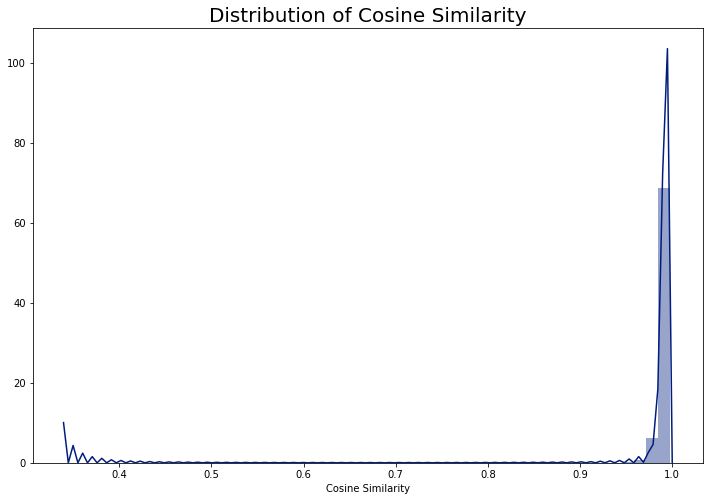

In [22]:
plt.figure(figsize=(12, 8)) 
ax = sns.distplot(edge_df.cosine_sim)
ax.set(xlabel = 'Cosine Similarity')
ax.set_title('Distribution of Cosine Similarity',fontsize = 20)

Text(0.5, 1.0, 'Distribution of Review Score - Source Album')

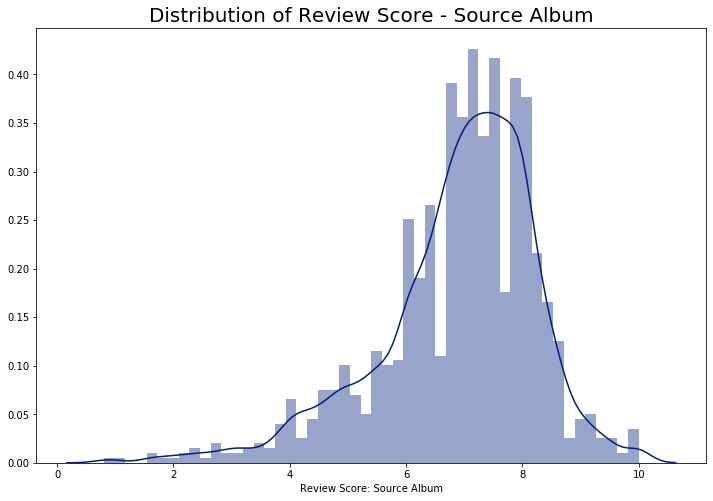

In [23]:
plt.figure(figsize=(12, 8)) 
ax = sns.distplot(edge_df.source_score)
ax.set(xlabel = 'Review Score: Source Album')
ax.set_title('Distribution of Review Score - Source Album',fontsize = 20)

Text(0.5, 1.0, 'Distribution of Review Score - Target Album')

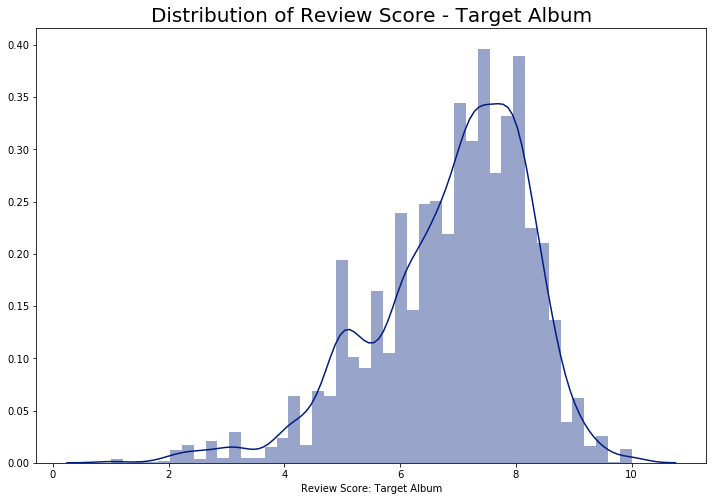

In [24]:
plt.figure(figsize=(12, 8)) 
ax = sns.distplot(edge_df.target_score)
ax.set(xlabel = 'Review Score: Target Album')
ax.set_title('Distribution of Review Score - Target Album',fontsize = 20)

In [25]:
# get the minimum of the two year columns
edge_df['source_year_master'] = edge_df[['source_year1', 'source_year2']].min(axis = 1)
edge_df['target_year_master'] = edge_df[['target_year1', 'target_year2']].min(axis = 1)

In [26]:
# regex cleanup of Joey Badass' album "B4.Da.$$" which caused a problem when plotting
edge_df['source_album'] = edge_df['source_album'].str.replace(r'b4\.da\.\$\$', 'BADASS')
edge_df['target_album'] = edge_df['target_album'].str.replace(r'b4\.da\.\$\$', 'BADASS')

In [27]:
# bin the source scores into 3 equal-sized groups
# using pandas qcut
pd.qcut(edge_df.source_score, 3).value_counts()

(6.6, 7.6]      1920
(0.799, 6.6]    1830
(7.6, 10.0]     1665
Name: source_score, dtype: int64

In [28]:
# bin the target scores into 3 equal-sized groups
pd.qcut(edge_df.target_score, 3).value_counts()

(0.999, 6.5]    1822
(6.5, 7.6]      1809
(7.6, 10.0]     1784
Name: target_score, dtype: int64

In [29]:
# assign quality labels to each album using
# the above binning method
edge_df['source_score_cut'] = pd.qcut(edge_df.source_score, 3, labels=['Bad', 'Good', 'Great'])
edge_df['target_score_cut'] = pd.qcut(edge_df.target_score, 3, labels=['Bad', 'Good', 'Great'])

In [30]:
# limit the selection to the top 2 similar target albums for each
# source album and 
# select rows where the target year is greater than the source year
# (definition of influence means later album can't influence earlier one)
edge_df_trim = edge_df[(edge_df.source_year_master< edge_df.target_year_master) & (edge_df.target_rank<3) ] 
edge_df_trim.shape

(831, 18)

In [31]:
edge_df_trim.head()

,source_id,source_album,source_artist,source_score,source_year1,source_year2,target_id,target_album,target_artist,target_score,target_year1,target_year2,target_rank,cosine_sim,source_year_master,target_year_master,source_score_cut,target_score_cut
100,22561,death certificate,ice cube,9.5,1991.0,NaN,20048,ferg forever,a$ap ferg,6.4,2014.0,NaN,1,0.994675,1991.0,2014.0,Great,Bad
101,22561,death certificate,ice cube,9.5,1991.0,NaN,18930,piata,"madlib, freddie gibbs",8.0,2014.0,NaN,2,0.994550,1991.0,2014.0,Great,Great
135,22566,blunted on reality,fugees,7.6,1994.0,2016.0,5711,street's disciple,nas,7.2,2004.0,NaN,1,0.989205,1994.0,2004.0,Good,Good
136,22566,blunted on reality,fugees,7.6,1994.0,2016.0,13373,slaughterhouse,slaughterhouse,5.5,2009.0,NaN,2,0.987979,1994.0,2009.0,Good,Bad
275,22132,things fall apart,the roots,9.4,1999.0,NaN,4331,power in numbers,jurassic 5,7.1,2002.0,NaN,1,0.992334,1999.0,2002.0,Great,Good


# Save out the master edge list

In [32]:
out_dir = 'D:\\Data\\Derived\\'

In [ ]:
joblib.dump(edge_df_trim, out_dir + 'edge_list_trim.pkl') 